In [53]:
# -*- coding: utf-8 -*-
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import numpy as np

In [54]:
class Loading():
    def __init__(self):
        local_zip = 'rps.zip'
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall('train_data/')
        zip_ref.close()
        self.train_dir = os.path.join('train_data','rps')
        
        local_zip = 'rps-test-set.zip'
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall('test_data/')
        zip_ref.close()
        self.test_dir = os.path.join('test_data','rps-test-set')
        
        
    def show_images(self):
        
        rock_train_dir = os.path.join(self.train_dir,'rock')
        paper_train_dir = os.path.join(self.train_dir,'paper')
        scissors_train_dir = os.path.join(self.train_dir,'scissors')
        
        print('total training rock images:', len(os.listdir(rock_train_dir)))
        print('total training paper images:', len(os.listdir(paper_train_dir)))
        print('total training scissors images:', len(os.listdir(scissors_train_dir)))
        
        rock_files = os.listdir(rock_train_dir)
        print(rock_files[:10])
        
        paper_files = os.listdir(paper_train_dir)
        print(paper_files[:10])
        
        scissors_files = os.listdir(scissors_train_dir)
        print(scissors_files[:10])
        
        
        next_rock = None
        next_paper = None
        next_scissors = None
        
        pic_index = 2
        
        next_rock = [os.path.join(rock_train_dir, fname) 
                        for fname in rock_files[pic_index-2:pic_index]]
        next_paper = [os.path.join(paper_train_dir, fname) 
                        for fname in paper_files[pic_index-2:pic_index]]
        next_scissors = [os.path.join(scissors_train_dir, fname) 
                        for fname in scissors_files[pic_index-2:pic_index]]
        
        for i, img_path in enumerate(next_rock+next_paper+next_scissors):
          #print(img_path)
          img = mpimg.imread(img_path)
          plt.imshow(img)
          plt.axis('Off')
          plt.show()
        

In [55]:
load_data_obj = Loading()

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-108.png', 'rock03-112.png', 'rock06ck02-084.png', 'rock02-002.png', 'rock03-086.png', 'rock03-102.png', 'rock07-k03-009.png', 'rock04-071.png', 'rock04-036.png', 'rock06ck02-049.png']
['paper04-087.png', 'paper03-025.png', 'paper07-036.png', 'paper01-024.png', 'paper04-034.png', 'paper04-080.png', 'paper01-011.png', 'paper05-118.png', 'paper05-038.png', 'paper04-026.png']
['scissors01-086.png', 'scissors04-062.png', 'scissors03-065.png', 'testscissors01-095.png', 'scissors01-110.png', 'testscissors02-044.png', 'scissors03-060.png', 'testscissors02-039.png', 'testscissors01-115.png', 'scissors03-087.png']


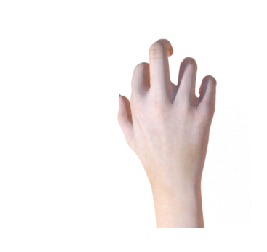

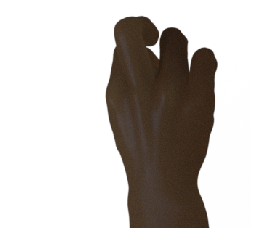

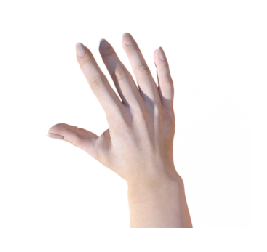

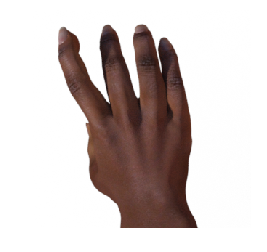

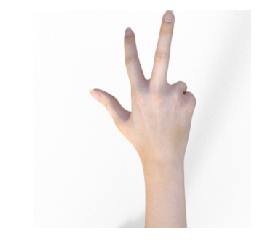

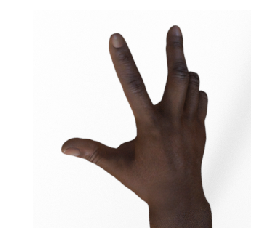

In [56]:
load_data_obj.show_images()

In [57]:
class Preprocessing(object):
    def __init__(self):
        self.train_generator = None
        self.train_generator = None  
        
    def image_augmentation(self):
        
        train_datagen = ImageDataGenerator(
            rescale = 1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
        
        self.train_generator = train_datagen.flow_from_directory(
            load_data_obj.train_dir,
            target_size=(150,150),
            class_mode='categorical')
        
        test_datagen = ImageDataGenerator(rescale = 1./255)
        self.test_generator = test_datagen.flow_from_directory(
            load_data_obj.test_dir,
            target_size = (150,150),
            class_mode = 'categorical')
        

In [58]:
preprocess_obj = Preprocessing()
preprocess_obj.image_augmentation()

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [65]:
class DesignModel():
    
    def __init__(self):
        self.model = None
        self.history = None
        self.train_generator = preprocess_obj.train_generator
        self.validation_generator = preprocess_obj.test_generator
        
    
    def create_model(self):
        model = tf.keras.models.Sequential()
        
        model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
        model.add(tf.keras.layers.MaxPooling2D(2, 2))
        
        model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(2,2))
        
        model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(2,2))

        model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(2,2))

        model.add(tf.keras.layers.Flatten())
        
        model.add(tf.keras.layers.Dropout(0.5))
            
        model.add(tf.keras.layers.Dense(512, activation='relu'))
        model.add(tf.keras.layers.Dense(3, activation='softmax'))
        self.model = model
        self.model.summary()
        self.model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

        
    def train(self):
        self.history = self.model.fit(self.train_generator, epochs=25, validation_data = self.validation_generator, verbose = 1)
        self.model.save("rps.h5")
          

In [66]:
model_obj = DesignModel()
model_obj.create_model()
model_obj.train()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

In [70]:
class Evaluation():
    def __init__(self):
        self.acc = None
        self.val_acc = None
        self.loss = None
        self.val_loss = None 
        self.history = model_obj.history
    def get_metrics(self):
        
        self.acc = self.history.history['accuracy']
        self.val_acc = self.history.history['val_accuracy']
        self.loss = self.history.history['loss']
        self.val_loss = self.history.history['val_loss']

    def plot_accuracy(self):
        epochs = range(len(self.acc))
        
        plt.plot(epochs, self.acc, 'r', label='Training Accuracy')
        plt.plot(epochs, self.val_acc, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend(loc=0)
        plt.figure()
        plt.show()
        
    def plot_loss(self):
        epochs = range(len(self.acc))
        
        plt.plot(epochs, self.loss, 'r', label='Training Loss')
        plt.plot(epochs, self.val_loss, 'b', label='Validation Loss')
        plt.title('Training and validation accuracy')
        plt.legend(loc=0)
        plt.figure()
        plt.show()

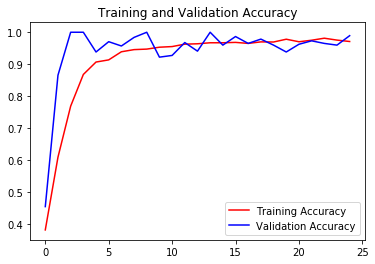

<Figure size 432x288 with 0 Axes>

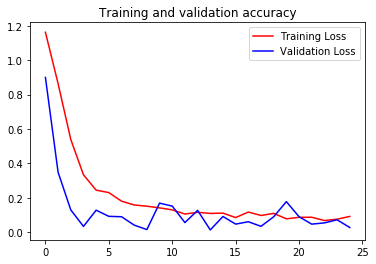

<Figure size 432x288 with 0 Axes>

In [71]:
eval_obj = Evaluation()
eval_obj.get_metrics()
eval_obj.plot_accuracy()
eval_obj.plot_loss()

In [125]:
class Prediction():
    def __init__(self):
        self.model = model_obj.model
        classes = preprocess_obj.train_generator.class_indices
        self.classes = {v:k for k,v in classes.items()}
        print(classes)
    def call_prediction(self):
        local_zip = 'rps-validation.zip'
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall('predicion_data/')
        zip_ref.close()
        test_dir = os.path.join('predicion_data')
        files = os.listdir(test_dir)
        for image in files:
            image_path = os.path.join(test_dir,image)
            self.predict(image_path)
    
    def predict(self,path):
        img = image.load_img(path, target_size=(150, 150))
        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        pred = self.model.predict(images)
        pred = np.argmax(pred)
        pred = self.classes[pred]
        
        img = mpimg.imread(path)
        plt.imshow(img)
        plt.title("prediction: "+str(pred))
        plt.show()

{'paper': 0, 'rock': 1, 'scissors': 2}


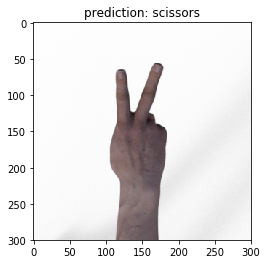

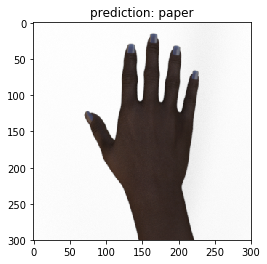

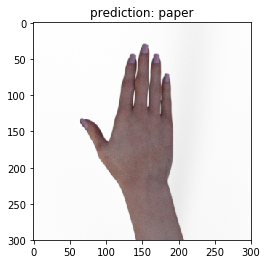

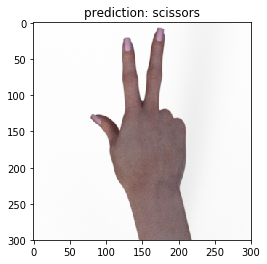

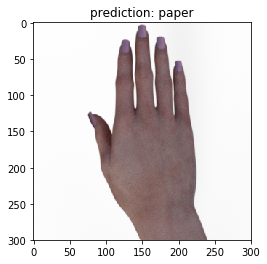

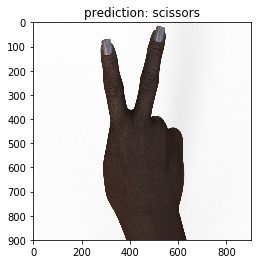

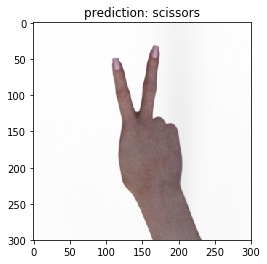

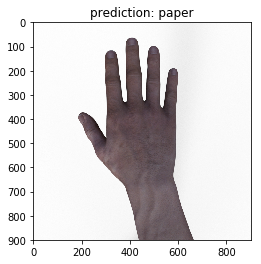

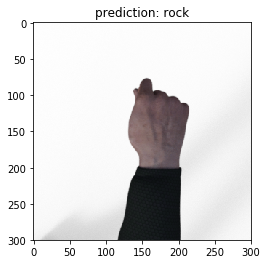

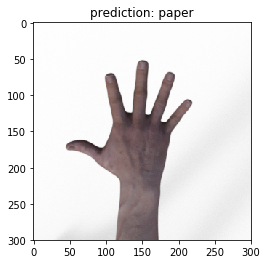

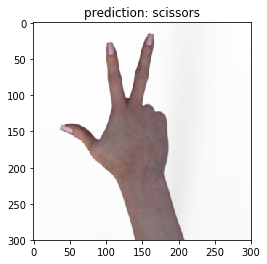

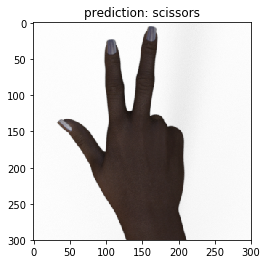

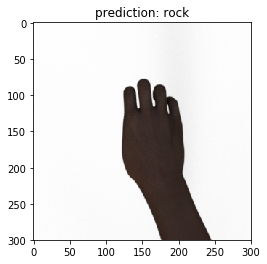

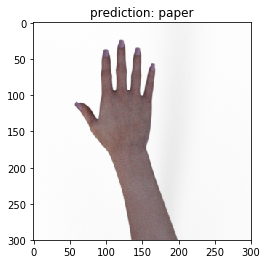

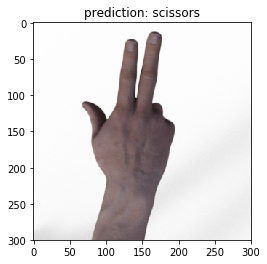

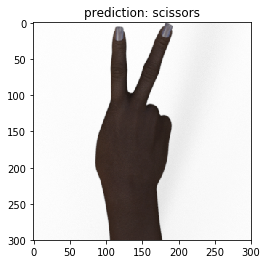

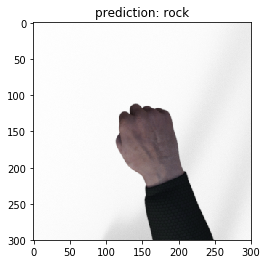

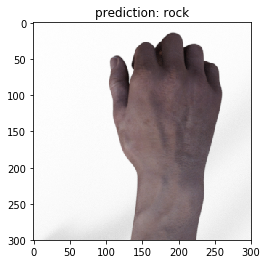

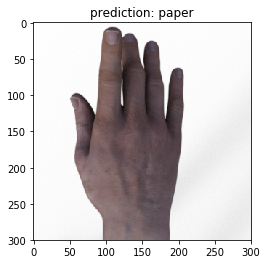

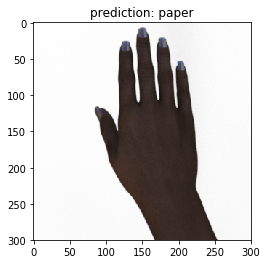

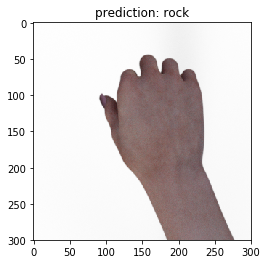

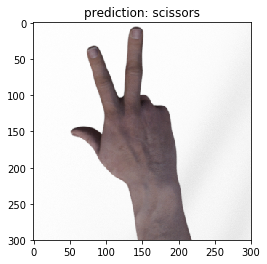

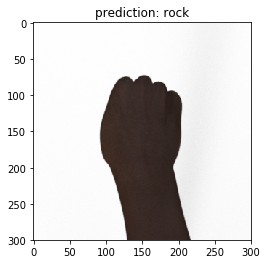

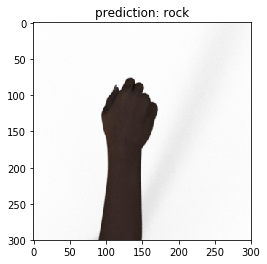

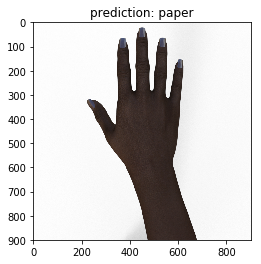

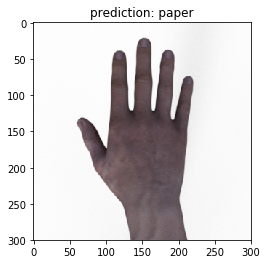

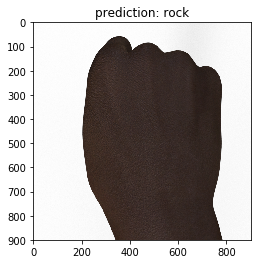

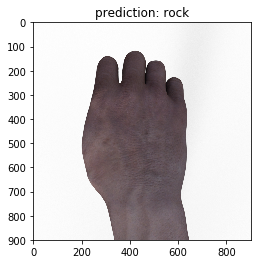

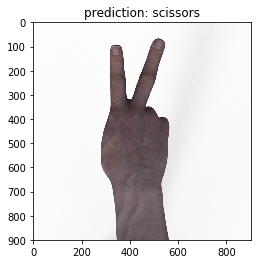

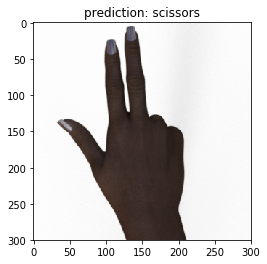

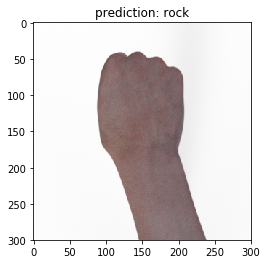

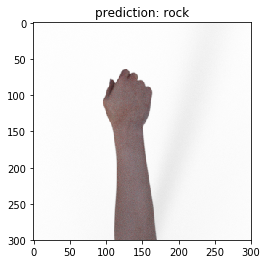

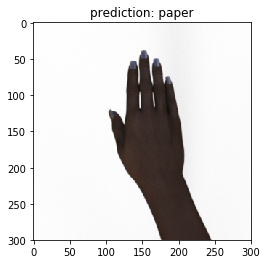

In [126]:
pred_obj = Prediction()
pred_obj.call_prediction()